In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

/Users/swathimanikyavallabhajosyula/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# "training_data.csv"
data_l= ["training_data_pp.csv", "training_data_n1.csv", "training_data_pp1.csv", "training_data_n2.csv", "training_data_pp_low.csv"]

frames = []
for fi in data_l:
    fi_open = "GrayScott/"+fi
    df = pd.read_csv(fi_open)
    frames.append(df)

data = pd.concat(frames)

print(data.dtypes)


run_config                     object
sys_name                       object
sys_processor                  object
sys_phy_cores_count             int64
sys_tot_cores_count             int64
sys_cpufreq_mhz               float64
sys_phy_mem_bytes               int64
sys_swap_mem_bytes              int64
exe_L                           int64
exe_Du                        float64
exe_Dv                        float64
exe_F                         float64
exe_k                         float64
exe_dt                        float64
exe_plotgap                     int64
exe_steps                       int64
exe_noise                     float64
exe_output                     object
exe_checkpoint                   bool
exe_checkpoint_freq             int64
exe_checkpoint_output          object
exe_adios_config               object
exe_adios_span                   bool
exe_adios_memory_selection       bool
exe_mesh_type                  object
run_nprocs                      int64
run_settings

In [3]:
print("Stats:")
print("Columns totoal:", len(data.columns))
# print(data.head())

imp_columns= Dist_cols = ['sys_name', 'sys_processor', 'sys_phy_cores_count',
       'sys_tot_cores_count', 'sys_cpufreq_mhz', 'sys_phy_mem_bytes',
       'sys_swap_mem_bytes', 'exe_L', 'exe_Du', 'exe_Dv', 'exe_F', 'exe_k',
       'exe_dt', 'exe_plotgap', 'exe_steps', 'exe_noise', 'exe_output',
       'exe_checkpoint', 'exe_checkpoint_freq', 'exe_checkpoint_output',
       'exe_adios_config', 'exe_adios_span', 'exe_adios_memory_selection',
       'exe_mesh_type', 'run_nprocs', 'total_exe_time_ms',
       'max_bytes_read_mb', 'max_bytes_written_mb', 'max_read_bw_mbps',
       'max_write_bw_mbps']

target_colum = 'total_exe_time_ms'
print("Coulmn Name", "Unique Values?")
for col in imp_columns:
    print(col, data[col].unique())

Stats:
Columns totoal: 41
Coulmn Name Unique Values?
sys_name ['Linux']
sys_processor ['x86_64']
sys_phy_cores_count [4 2 3 1]
sys_tot_cores_count [4 2 3 1]
sys_cpufreq_mhz [2304.]
sys_phy_mem_bytes [4119924736 4119932928 6246445056 2217390080 2217431040]
sys_swap_mem_bytes [2147479552]
exe_L [ 64  16 128  69  68  65  70  66  67  71  72]
exe_Du [0.1  0.2  0.15]
exe_Dv [0.1  0.2  0.15]
exe_F [0.02 0.01 0.04]
exe_k [0.048 0.04  0.05 ]
exe_dt [ 1.  2.  5. 10.]
exe_plotgap [10]
exe_steps [ 100  150 1000  500]
exe_noise [1.e-07 1.e-06]
exe_output ['gs.bp']
exe_checkpoint [False]
exe_checkpoint_freq [10]
exe_checkpoint_output ['gs_ckpt.bp']
exe_adios_config ['adios2.xml']
exe_adios_span [False]
exe_adios_memory_selection [False]
exe_mesh_type ['image']
run_nprocs [ 2 15 10 20  5  3  1  4  8]
total_exe_time_ms [ 2.17669678  2.04691029  1.91877174 ...  2.40078974 26.01813412
  3.27047777]
max_bytes_read_mb [129200.]
max_bytes_written_mb [4433.  247.]
max_read_bw_mbps [ 7005.  5254.  5838.  553

In [4]:
print("Coulmn Name", "Has missing Features?")
for col in imp_columns:
    print(col, data[col].isnull().values.any())
   

Coulmn Name Has missing Features?
sys_name False
sys_processor False
sys_phy_cores_count False
sys_tot_cores_count False
sys_cpufreq_mhz False
sys_phy_mem_bytes False
sys_swap_mem_bytes False
exe_L False
exe_Du False
exe_Dv False
exe_F False
exe_k False
exe_dt False
exe_plotgap False
exe_steps False
exe_noise False
exe_output False
exe_checkpoint False
exe_checkpoint_freq False
exe_checkpoint_output False
exe_adios_config False
exe_adios_span False
exe_adios_memory_selection False
exe_mesh_type False
run_nprocs False
total_exe_time_ms False
max_bytes_read_mb False
max_bytes_written_mb False
max_read_bw_mbps False
max_write_bw_mbps False


In [5]:
Dist_cols = ['sys_phy_cores_count',
       'sys_tot_cores_count', 'sys_phy_mem_bytes',
       'exe_L', 'exe_Du', 'exe_Dv', 'exe_F', 'exe_k',
       'exe_dt', 'exe_steps', 'exe_noise', 'run_nprocs', 
       'max_bytes_written_mb', 'max_read_bw_mbps',
       'max_write_bw_mbps']
target_colum = 'total_exe_time_ms'
print("Coulmn Name", "Unique Values?")
for col in Dist_cols:
    print(col, data[col].unique())

all_cols = Dist_cols+[target_colum]
X_Features = data[Dist_cols]
Y_value = data[[target_colum]]
all_data_final=data[all_cols]

Coulmn Name Unique Values?
sys_phy_cores_count [4 2 3 1]
sys_tot_cores_count [4 2 3 1]
sys_phy_mem_bytes [4119924736 4119932928 6246445056 2217390080 2217431040]
exe_L [ 64  16 128  69  68  65  70  66  67  71  72]
exe_Du [0.1  0.2  0.15]
exe_Dv [0.1  0.2  0.15]
exe_F [0.02 0.01 0.04]
exe_k [0.048 0.04  0.05 ]
exe_dt [ 1.  2.  5. 10.]
exe_steps [ 100  150 1000  500]
exe_noise [1.e-07 1.e-06]
run_nprocs [ 2 15 10 20  5  3  1  4  8]
max_bytes_written_mb [4433.  247.]
max_read_bw_mbps [ 7005.  5254.  5838.  5531.  6181.  4776.  4674.  6568.  5842.  5004.
  4569.  7506.  8083.  4378.  9553.  8757.  7789.  3284.  3892.  4203.
  2840.  3184.  3623.  3753.  3503.  2694.  2919.  3002.  4042.  1876.
  3390.  1751.  3091.  3895.  2236.  2388.  1798.  2765.  2021.  2444.
  1812.  2627.  9984. 10510. 11680.]
max_write_bw_mbps [ 174.4   256.4   170.5   622.7   544.9   554.1   633.3   726.5   363.2
   76.47  443.3   492.6   161.4   369.4   147.8   484.3   164.2   396.3
  435.9   181.6   272.4   341. 

(16.0, 0.0)

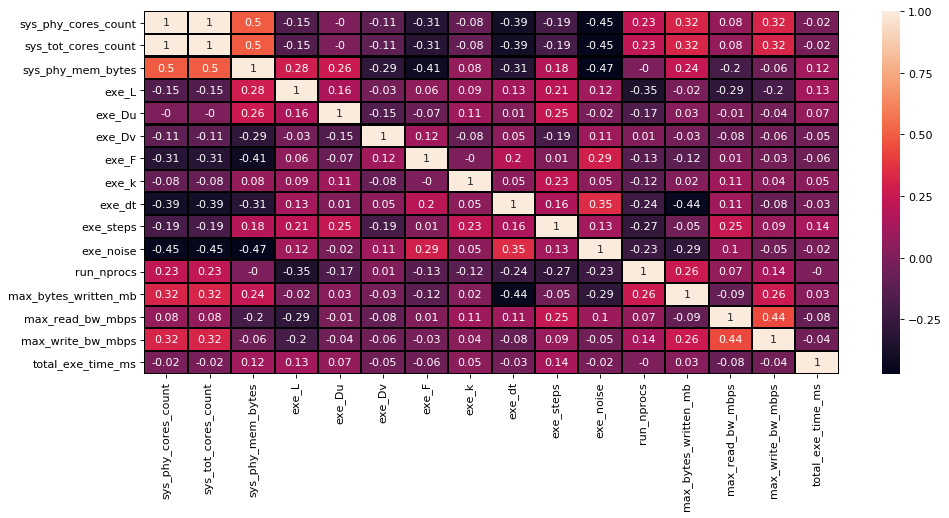

In [9]:
correlation_mat = round(all_data_final.corr(),2)

figure(figsize=(14, 6), dpi=80)
ax = sns.heatmap(correlation_mat, annot = True, xticklabels=all_cols, linewidths=1, linecolor='black')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


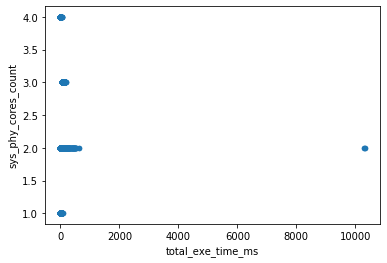

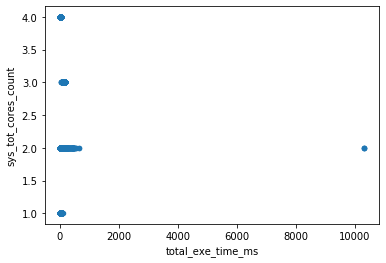

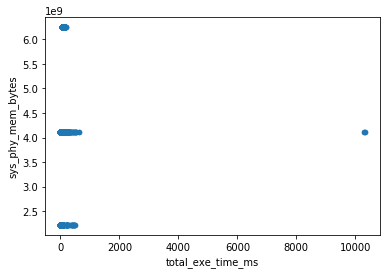

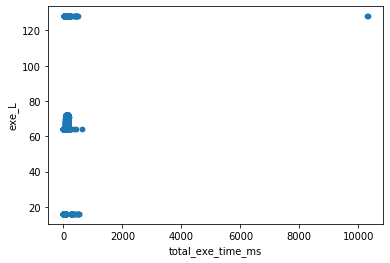

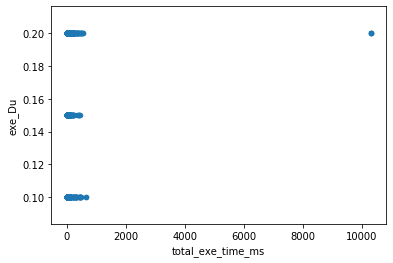

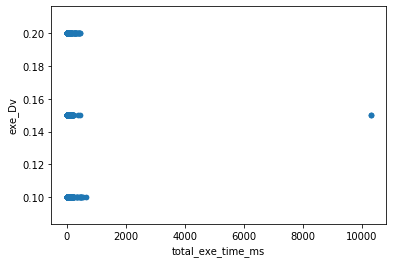

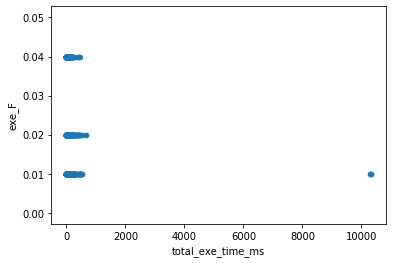

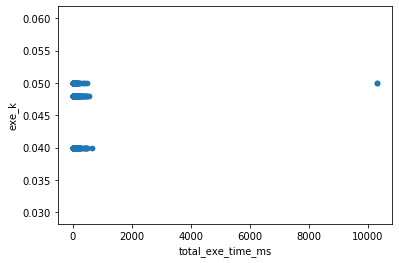

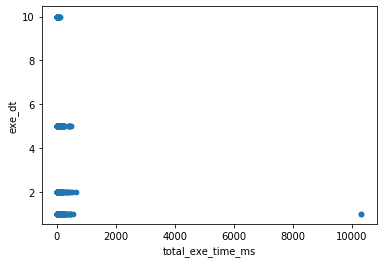

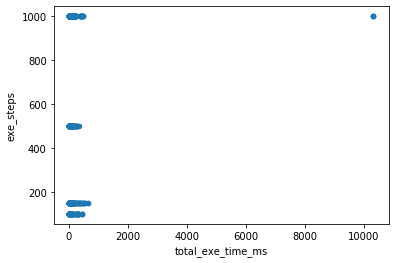

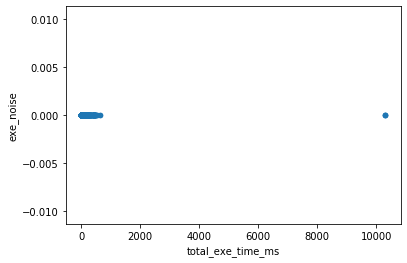

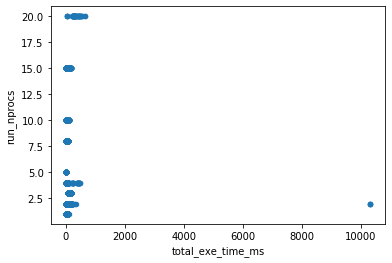

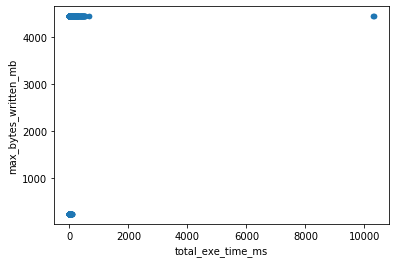

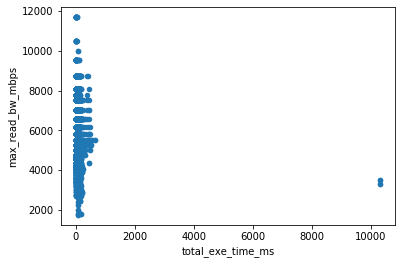

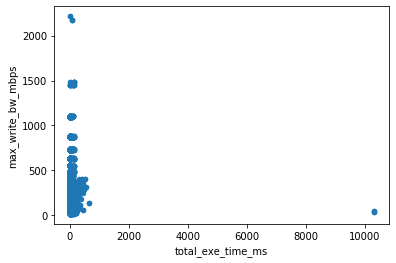

In [7]:
# sns.pairplot(X_Features)

for col in Dist_cols:
    ax = all_data_final.plot.scatter(x=target_colum, y=col)

In [8]:
# Removing Outliers:
"""
all_cols = Dist_cols+[target_colum]
X_Features = data[Dist_cols]
Y_value = data[[target_colum]]
all_data_final=data[all_cols]
all_data_final_noOut=all_data_final[(np.abs(temp) < 2).all(axis=1)]
"""
scaler = StandardScaler()
scaler.fit(all_data_final)
temp = scaler.transform(all_data_final)
# print(np.abs(stats.zscore(df)))
all_data_final_noOut = all_data_final[(np.abs(temp) < 3).all(axis=1)]

/Users/swathimanikyavallabhajosyula/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/swathimanikyavallabhajosyula/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


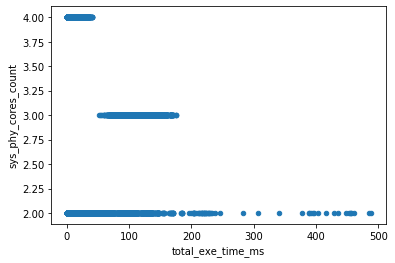

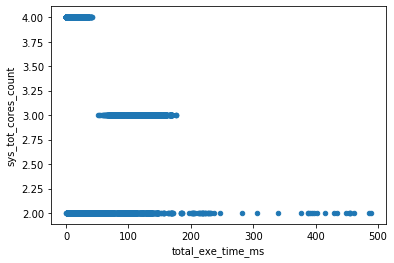

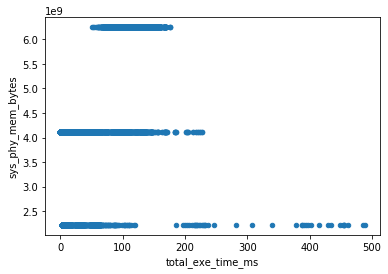

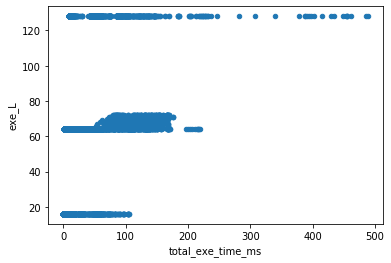

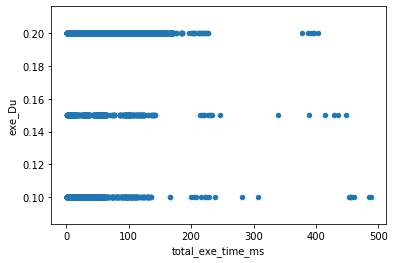

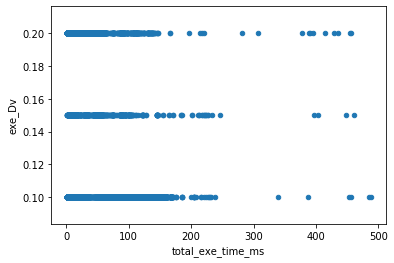

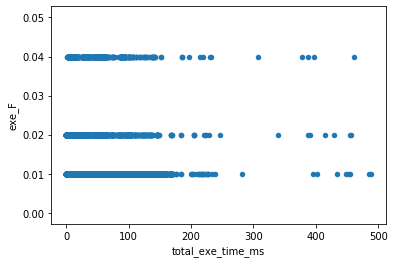

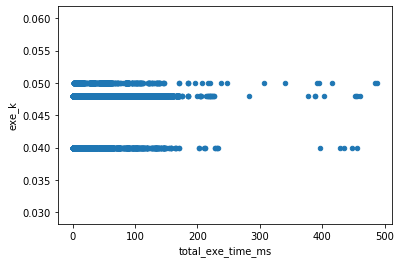

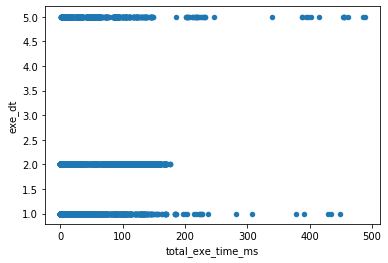

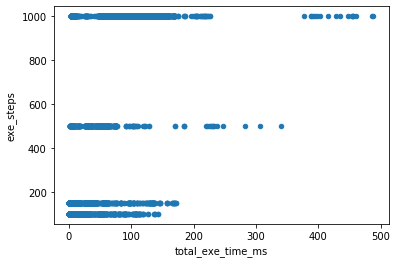

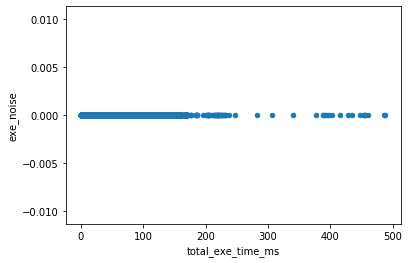

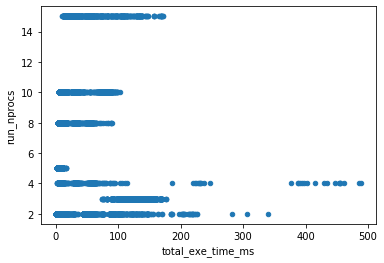

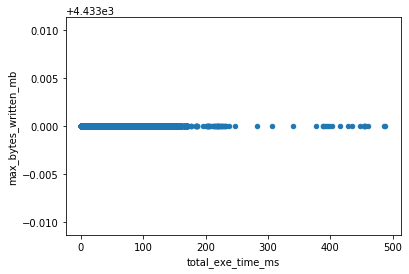

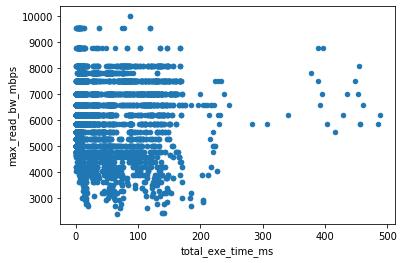

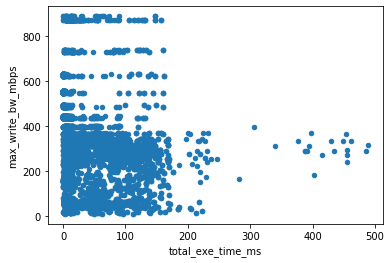

In [10]:
for col in Dist_cols:
    ax = all_data_final_noOut.plot.scatter(x=target_colum, y=col)

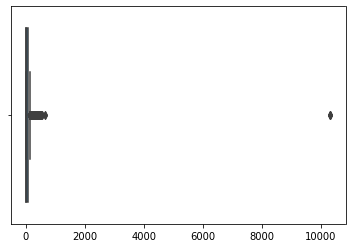

In [11]:
sns.boxplot(all_data_final[[target_colum]])

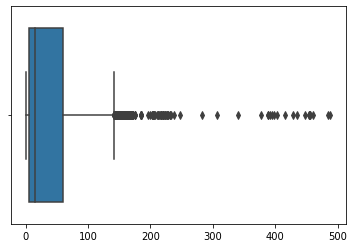

In [12]:
sns.boxplot(all_data_final_noOut[[target_colum]])

In [13]:
print("Before Clean Up:", all_data_final.shape, "After Clean up:", all_data_final_noOut.shape)

all_data_final_noOut.to_csv('gray_scott_noPCA.csv', header=True, index=False)
print(Dist_cols)

Before Clean Up: (8486, 16) After Clean up: (7836, 16)
['sys_phy_cores_count', 'sys_tot_cores_count', 'sys_phy_mem_bytes', 'exe_L', 'exe_Du', 'exe_Dv', 'exe_F', 'exe_k', 'exe_dt', 'exe_steps', 'exe_noise', 'run_nprocs', 'max_bytes_written_mb', 'max_read_bw_mbps', 'max_write_bw_mbps']


## RUNNING PCA

In [14]:
"""
all_cols = Dist_cols+[target_colum]
X_Features = data[Dist_cols]
Y_value = data[[target_colum]]
all_data_final=data[all_cols]
all_data_final_noOut=all_data_final[(np.abs(temp) < 2).all(axis=1)]
"""

X_Features_noOut = all_data_final_noOut[Dist_cols]
x = X_Features_noOut.values
X_Features_noOut_norm = StandardScaler().fit_transform(x)
all_data_final_noOut_norm = pd.DataFrame(X_Features_noOut_norm, columns=Dist_cols)

pca_test = PCA(n_components=len(Dist_cols), random_state=2020)
pca_test.fit(X_Features_noOut_norm)
x_pca_test = pca_test.transform(X_Features_noOut_norm)
print(pca_test.explained_variance_ratio_*100)
print(np.cumsum(pca_test.explained_variance_ratio_*100))


[2.29429655e+01 1.58653314e+01 1.33175996e+01 7.60774138e+00
 6.35728691e+00 5.72213938e+00 5.60803209e+00 5.25446471e+00
 4.82271358e+00 4.52454152e+00 3.46867712e+00 2.83050737e+00
 1.67799936e+00 1.38582810e-29 7.50726155e-33]
[ 22.94296552  38.80829694  52.12589657  59.73363796  66.09092487
  71.81306425  77.42109634  82.67556105  87.49827463  92.02281615
  95.49149327  98.32200064 100.         100.         100.        ]


In [15]:
# pca_test = PCA(n_components=len(Dist_cols), random_state=2020)
# pca_test.fit(X_Features_noOut_norm)
# x_pca_test = pca_test.transform(X_Features_noOut_norm)
# print(pca_test.explained_variance_ratio_*100)
# print(np.cumsum(pca_test.explained_variance_ratio_*100))


no_of_fetures = 13
pca_n = PCA(n_components=no_of_fetures, random_state=2020)
pca_n.fit(X_Features_noOut_norm)
x_pca_n = pca_n.transform(X_Features_noOut_norm)
print(pca_n.explained_variance_ratio_*100)
print(np.cumsum(pca_n.explained_variance_ratio_*100))


df_pca = pd.DataFrame(x_pca_n)
df_pca['walltime'] = all_data_final_noOut[target_colum].values
# df_pca.describe()

[22.94296552 15.86533143 13.31759963  7.60774138  6.35728691  5.72213938
  5.60803209  5.25446471  4.82271358  4.52454152  3.46867712  2.83050737
  1.67799936]
[ 22.94296552  38.80829694  52.12589657  59.73363796  66.09092487
  71.81306425  77.42109634  82.67556105  87.49827463  92.02281615
  95.49149327  98.32200064 100.        ]


(13.0, 0.0)

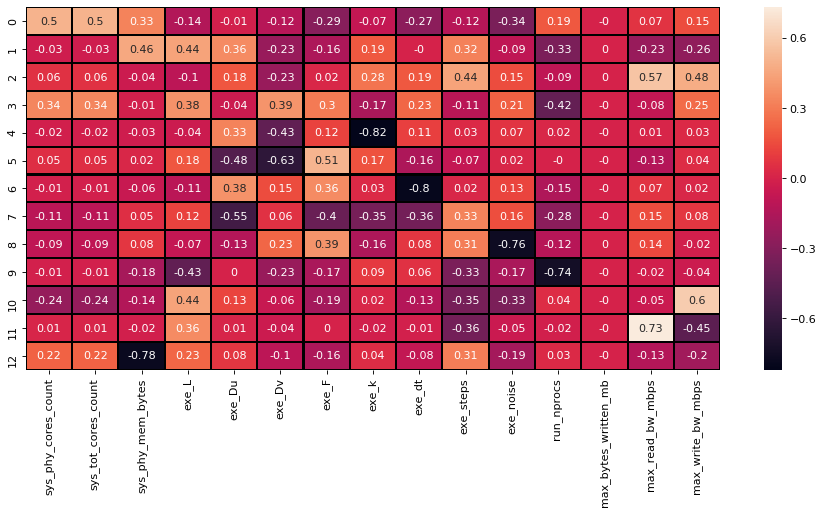

In [18]:
figure(figsize=(14, 6), dpi=80)
values_temp=pca_n.components_.round(2)
ax = sns.heatmap(values_temp, xticklabels=Dist_cols, linewidths=1, linecolor='black', annot = True) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


In [19]:
df_pca.to_csv('DNN.csv', header=True, index=False)

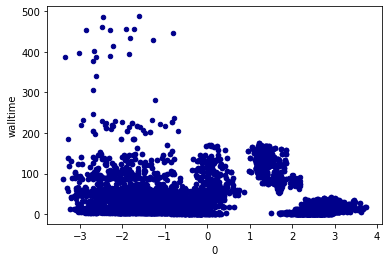

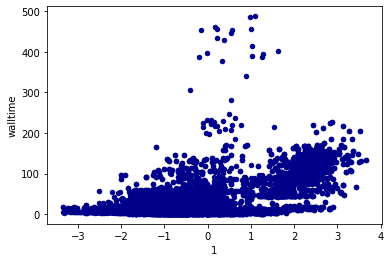

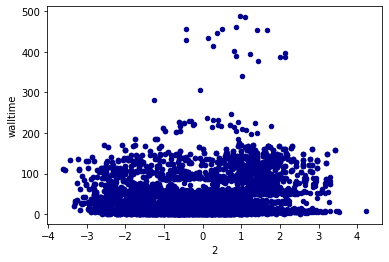

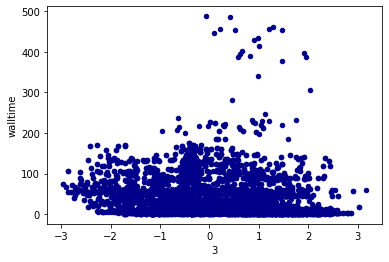

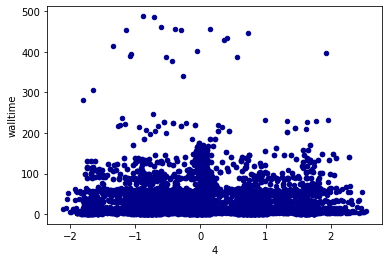

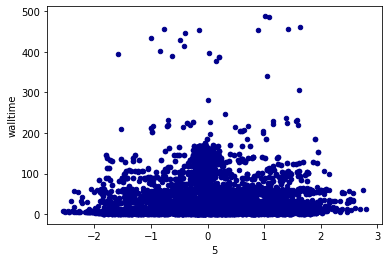

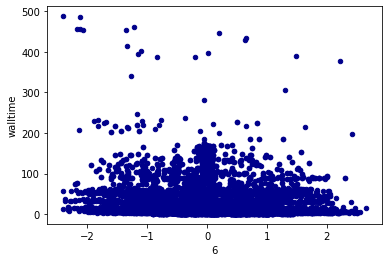

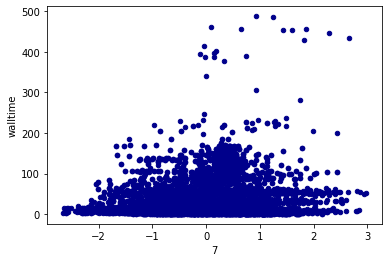

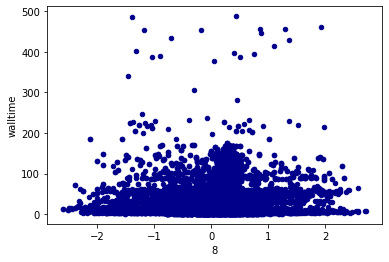

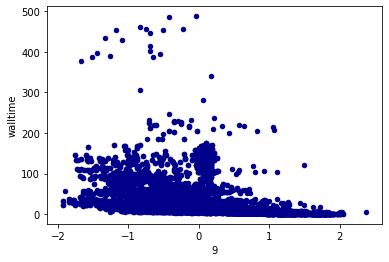

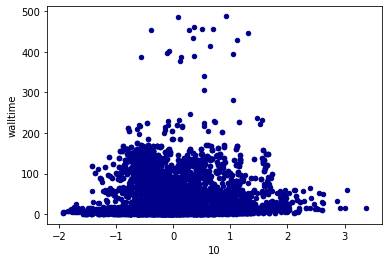

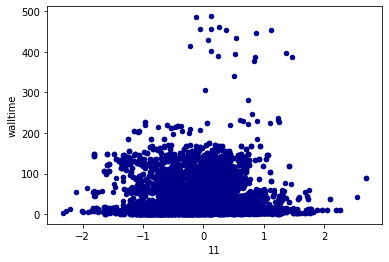

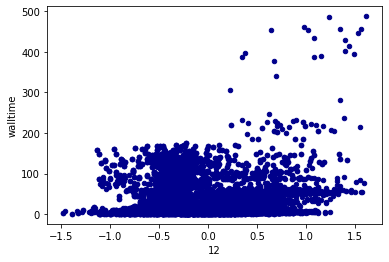

In [20]:
for i in range(0, 13):
    ax1 = df_pca.plot.scatter(x=i, y='walltime', c='DarkBlue')
    # ax1 = df_pca.plot.scatter(y=0, c=1, x='walltime',  colormap='viridis')